In [66]:
%pip install pandas numpy matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [68]:
np.random.seed(40)
x=np.random.rand(100,1)*10
y=3*x.flatten()+np.random.rand(100)*2
df=pd.DataFrame({"Features":x.flatten(),"Target":y.flatten()})
df.head()

,Features,Target
0,4.076870,13.652148
1,0.553660,3.592569
2,7.885349,23.664495
3,2.873052,9.054746
4,4.503506,14.433047


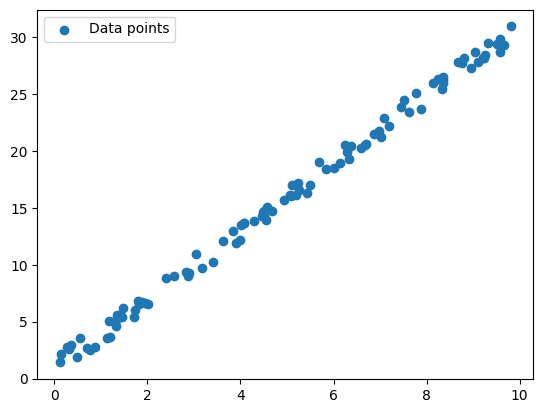

In [69]:
plt.scatter(x,y,label="Data points")
plt.legend()
plt.show()

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled= scaler.fit_transform(x_test)

In [72]:
from sklearn.linear_model import LinearRegression
abc=LinearRegression()
abc.fit(x_train,y_train)
predictions=abc.predict(x_test)

In [73]:
# lets plot the linear regression fit

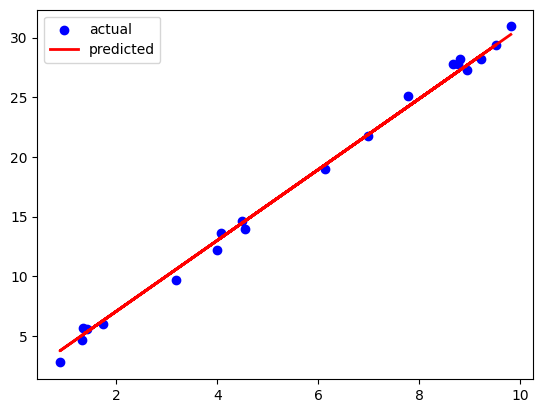

In [74]:
plt.scatter(x_test,y_test,color="blue",label="actual")
plt.plot(x_test,predictions,color="red",label="predicted",linewidth=2)
plt.legend()
plt.show()

In [75]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score

mae=mean_absolute_error(y_test,predictions)
mse=mean_squared_error(y_test,predictions)
r2=r2_score(y_test,predictions)
print(mae)
print(mse)
print(r2)

0.538046608000024
0.37580758794442315
0.9959499767647899


In [76]:
# next going to apply l1 and l2 

In [77]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
ridge=Ridge(alpha=1.0)
ridge.fit(x_train,y_train)
ridge_prediction=ridge.predict(x_test)


In [78]:
Lasso=Lasso(alpha=1.0)
Lasso.fit(x_train,y_train)
Lasso_prediction=Lasso.predict(x_test)

In [79]:
elastic=ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic.fit(x_train,y_train)
elastic_predictions = elastic.predict(x_test)


In [80]:
models={"Linear":abc,"Ridge":ridge,"lasso":Lasso,"elstic":elastic}
for name,model in models.items():
    prediction_model=model.predict(x_test)
    print(f"{name} \n r2_score ---> {r2_score(y_test,prediction_model):.4f}")

Linear 
 r2_score ---> 0.9959
Ridge 
 r2_score ---> 0.9959
lasso 
 r2_score ---> 0.9919
elstic 
 r2_score ---> 0.9954
